In [2]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 KB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 KB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394486 sha256=776d205a72eb5e81868078136f00b1f8261261d309a86a5956b57c41ef9be0fa
  Stored in directory: /root/.cache/pip/wheels/19/1d/3a/0a8c14c30132b4f9ffd796efbb6746f15b3d6bcfc1055a9346
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp38-cp38-linux_x86_64.whl size=180686 sha256=7d0cb276c784ab4bf075cb8f8d94ee3cecc5235424585037da01644d9a154d3d
  Stored in directory: /root/.cache/pip/wheels/3c/d8/9f/59fd78b2b7d1e9ffcb68fb6de80c2e7c20b804c8cbc4d8fc23
Successfully built nltk libwapiti
  Attempting unin

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import codecs
import math
import numpy as np
import tqdm
import torch
from hazm import *

class Loader:
    path_data = '/content/drive/My Drive/ce.sharif.edu/nlp/project/data/sample.out.txt'
    start_tag_list = ['<c>', '<e>']
    end_tag_list = ['</c>', '</e>']
    tag_to_id = {'O' :0 , 'B-CAUSE' : 1, 'I-CAUSE' : 2, 'B-EFFECT' : 3, 'I-EFFECT' : 4}
    none_tag = 'O'

    def __init__(self):
        self.normalizer = Normalizer()
        self.lemmatizer = Lemmatizer()

    def create_data_label(self):
        lines = codecs.open(self.path_data, 'r', 'utf-8').readlines()

        dataset = {'tokens': [], 'tags': []}
        data = []
        for sent in lines:
            sent = self.normalizer.normalize(sent)
            token_list = []
            label_list = []
            last_tag = 'O'
            for token in word_tokenize(sent):
                if token in ['<m>', '</m>']:
                    continue
                if token in self.start_tag_list:
                    last_tag = 'B-CAUSE' if token == '<c>' else 'B-EFFECT' 
                    continue
                if token in self.end_tag_list:
                    last_tag = 'O'
                    continue

                token_list.append(self.lemmatizer.lemmatize(token))
                label_list.append(self.tag_to_id[last_tag])
                if last_tag =='B-CAUSE':
                    last_tag = 'I-CAUSE'
                if last_tag =='B-EFFECT':
                    last_tag = 'I-EFFECT'

            dataset["tokens"].append(token_list)
            dataset["tags"].append(label_list)
        return dataset

loader = Loader()
dataset = loader.create_data_label()
print(f'DataSet = {dataset}')


DataSet = {'tokens': [['این', 'مساله', 'باعث', 'شد#شو', 'او', 'را', 'از', 'بانفوذ', 'اعضا', 'جوان', 'حزب', 'ندا', 'ایران', 'در', 'میان', 'اصلاح', 'طلب', 'شناخت#شناس', '.'], ['او', 'سعی', 'کرد#کن', 'با', 'تشکیل', 'جلسات', 'مختلف', 'با', 'عنوان', '«', 'چرا', 'خاتم', '؟', '»', 'او', 'را', 'برای', 'حضور', 'در', 'انتخابات', 'ترغیب', 'کند', '.'], ['این', 'اظهارنظر', 'باعث', 'تیره', 'شدن', 'روابط', 'بین', 'دو', 'حزب', 'شد#شو', '.'], ['چیهار', 'فعالیت', 'حرفه\u200cای', 'موسیقی', 'را', 'با', 'گروه', 'متال', 'مجارستان', 'تورمنتور', 'آغاز', 'کرد#کن', 'که', 'باعث', 'شد#شو', 'نام', 'در', 'محافل', 'موسیقی', 'بلک', 'متال', 'مطرح', 'شد#شو', '.'], ['ضبط', 'این', 'آلبوم', 'که', 'قطعات', 'از', 'سال', '۱۹۸۷', 'آماده', 'بود#باش', 'به', 'دلایل', 'مختلف', 'از', 'جمله', 'خودکشی', 'دد', 'خواننده', 'گروه', 'و', 'قتل', 'ارونیموس', '(', 'گیتاریست', ')', 'تا', 'آن', 'زمان', 'به', 'تعویق', 'افتاده', 'بود#باش', '.'], ['چیهار', 'تجربه', '۱', 'ازدواج', 'منجر', 'به', 'طلاق', 'داشته', 'که', 'حاصل', 'آن', '۲', 'فرزند', '

In [6]:
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.8 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [8]:
from datasets import Dataset, DatasetDict
dataset_all = Dataset.from_dict(dataset)
dataset_all.shuffle()
datasets_train_test = dataset_all.train_test_split(train_size=0.8)
datasets_train_validation = datasets_train_test['train'].train_test_split(train_size=0.8)

datasets = DatasetDict({'train': datasets_train_validation['train'],
                        'validation': datasets_train_validation['test'],
                        'test': datasets_train_test['test'],
                        })
datasets

DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 2100
    })
    validation: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 525
    })
    test: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 657
    })
})

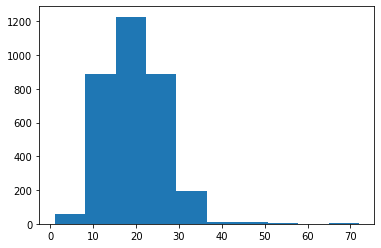

In [9]:
# Disitribution token length total dataset
import matplotlib.pyplot as plt
 
token_length_dataset_all = [len(x) for x in dataset_all["tokens"]]

plt.hist(token_length_dataset_all, bins=10)
plt.show()

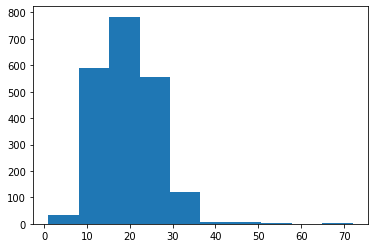

In [10]:
# Disitribution token length train dataset
import matplotlib.pyplot as plt
 
token_length_dataset_train = [len(x) for x in datasets["train"]["tokens"]]

plt.hist(token_length_dataset_train, bins=10)
plt.show()

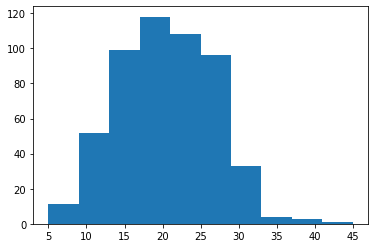

In [11]:
# Disitribution token length validation dataset
import matplotlib.pyplot as plt
 
token_length_dataset_validation = [len(x) for x in datasets["validation"]["tokens"]]

plt.hist(token_length_dataset_validation, bins=10)
plt.show()

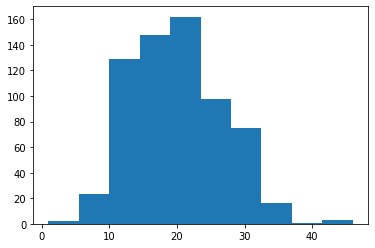

In [12]:
# Disitribution token length test dataset
import matplotlib.pyplot as plt
 
token_length_dataset_test = [len(x) for x in datasets["test"]["tokens"]]

plt.hist(token_length_dataset_test, bins=10)
plt.show()

In [14]:
!pip install transformers
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 44.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from transformers import AutoTokenizer, BertForTokenClassification
import torch

model_name = "HooshvareLab/bert-base-parsbert-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = BertForTokenClassification.from_pretrained(model_name)

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were no

In [16]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

    labels = []
    for i, label in enumerate(examples["tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            # Special tokens have a word id that is None. We set the label to -100 so they are automatically
            # ignored in the loss function.
            if word_idx is None:
                label_ids.append(-100)
            # We set the label for the first token of each word.
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            else:
                label_ids.append(label[word_idx] if label_all_tokens else -100)
            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [17]:
label_all_tokens = True
tokenized_datasets = datasets.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/2100 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/525 [00:00<?, ? examples/s]

Map:   0%|          | 0/657 [00:00<?, ? examples/s]

In [18]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer)

In [19]:
from transformers import BertForTokenClassification, TrainingArguments, Trainer

model = BertForTokenClassification.from_pretrained(model_name, num_labels=5) # 'O', 'B-CAUSE', 'I-CAUSE', 'B-EFFECT', 'I-EFFECT'

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were no

In [28]:
args = TrainingArguments(
    'cause-effect-training',
    evaluation_strategy = 'epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [22]:
! pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=350bb0d0768d2dc9208e3e4b85e92c6ace5187ec518bd9364f22446da5e50cf6
  Stored in directory: /root/.cache/pip/wheels/ad/5c/ba/05fa33fa5855777b7d686e843ec07452f22a66a138e290e732
Successfully built seqeval


In [23]:
from datasets import load_metric
metric = load_metric("seqeval")

<ipython-input-23-b45dd5e34816>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval")


In [24]:
label_list = ['O', 'B-CAUSE', 'I-CAUSE', 'B-EFFECT', 'I-EFFECT']

In [29]:
import numpy as np

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

In [30]:
trainer = Trainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [31]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: tags, tokens. If tags, tokens are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 2100
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 660
  Number of trainable parameters = 162254597


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.539974,0.362475,0.502799,0.421258,0.786196
2,No log,0.518415,0.407220,0.526119,0.459096,0.799935
3,No log,0.545956,0.453696,0.543843,0.494697,0.806926
4,0.463700,0.579665,0.450641,0.557836,0.498541,0.807577
5,0.463700,0.597542,0.449924,0.553172,0.496234,0.809203


The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: tags, tokens. If tags, tokens are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 525
  Batch size = 16
The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: tags, tokens. If tags, tokens are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 525
  Batch size = 16
The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: tags, tokens. If tags, tokens are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 525
  Ba

TrainOutput(global_step=660, training_loss=0.4068663337013938, metrics={'train_runtime': 5232.3022, 'train_samples_per_second': 2.007, 'train_steps_per_second': 0.126, 'total_flos': 212631920052240.0, 'train_loss': 0.4068663337013938, 'epoch': 5.0})

In [32]:
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: tags, tokens. If tags, tokens are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 525
  Batch size = 16


{'eval_loss': 0.5975416302680969,
 'eval_precision': 0.44992412746585736,
 'eval_recall': 0.5531716417910447,
 'eval_f1': 0.496234309623431,
 'eval_accuracy': 0.8092025038614746,
 'eval_runtime': 61.3326,
 'eval_samples_per_second': 8.56,
 'eval_steps_per_second': 0.538,
 'epoch': 5.0}

In [33]:
model_address = "/content/drive/My Drive/ce.sharif.edu/nlp/project/output_model"
trainer.save_model(model_address)
tokenizer.save_pretrained(model_address)

Saving model checkpoint to /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model
Configuration saved in /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model/config.json
Model weights saved in /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model/pytorch_model.bin
tokenizer config file saved in /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model/tokenizer_config.json
Special tokens file saved in /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model/special_tokens_map.json
tokenizer config file saved in /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model/tokenizer_config.json
Special tokens file saved in /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model/special_tokens_map.json


('/content/drive/My Drive/ce.sharif.edu/nlp/project/output_model/tokenizer_config.json',
 '/content/drive/My Drive/ce.sharif.edu/nlp/project/output_model/special_tokens_map.json',
 '/content/drive/My Drive/ce.sharif.edu/nlp/project/output_model/vocab.txt',
 '/content/drive/My Drive/ce.sharif.edu/nlp/project/output_model/added_tokens.json',
 '/content/drive/My Drive/ce.sharif.edu/nlp/project/output_model/tokenizer.json')

In [34]:
model.save_pretrained(model_address)

Configuration saved in /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model/config.json
Model weights saved in /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model/pytorch_model.bin


In [35]:
predictions, labels, _ = trainer.predict(tokenized_datasets["test"])
predictions = np.argmax(predictions, axis=2)

# Remove ignored index (special tokens)
true_predictions = [
    [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]
true_labels = [
    [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

results = metric.compute(predictions=true_predictions, references=true_labels)
results

The following columns in the test set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: tags, tokens. If tags, tokens are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 657
  Batch size = 16


{'CAUSE': {'precision': 0.5271604938271605,
  'recall': 0.6325925925925926,
  'f1': 0.5750841750841751,
  'number': 675},
 'EFFECT': {'precision': 0.40119760479041916,
  'recall': 0.4912023460410557,
  'f1': 0.4416611733684905,
  'number': 682},
 'overall_precision': 0.46322188449848023,
 'overall_recall': 0.5615327929255711,
 'overall_f1': 0.5076615589606929,
 'overall_accuracy': 0.8057946258458708}

In [36]:
import pandas as pd

In [37]:
token_lengths = []
overall_f1 = []
cause_f1 = []
effect_f1 = []


for i in range(len(true_predictions)):
  result = metric.compute(predictions=[true_predictions[i]], references=[true_labels[i]])
  if 'EFFECT' in result and 'CAUSE' in result:
    token_lengths.append(len(true_predictions[i]))
    overall_f1.append(result['overall_f1'])
    cause_f1.append(result['CAUSE']['f1'])
    effect_f1.append(result['EFFECT']['f1'])
  #print(results)

df = pd.DataFrame({'Token Length': token_lengths, 'Overall F1': overall_f1, 'F1 Cause': cause_f1, 'F1 Effect': effect_f1})
df


/usr/local/lib/python3.8/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Recall and F-score are ill-defined and 

,Token Length,Overall F1,F1 Cause,F1 Effect
0,20,1.0,1.000000,1.0
1,24,1.0,1.000000,1.0
2,20,1.0,1.000000,1.0
3,17,1.0,1.000000,1.0
4,12,1.0,1.000000,1.0
...,...,...,...,...
651,34,1.0,1.000000,1.0
652,19,0.5,1.000000,0.0
653,31,0.4,0.666667,0.0
654,23,0.5,0.000000,1.0


<AxesSubplot:xlabel='Token Length'>

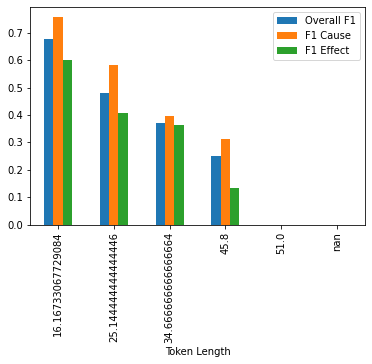

In [38]:
df.groupby(pd.cut(df["Token Length"], np.arange(10, 70+10, 10))).mean().plot.bar(x='Token Length')

In [40]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained(model_address)
model = AutoModelForTokenClassification.from_pretrained(model_address)

loading file vocab.txt
loading file tokenizer.json
loading file added_tokens.json
loading file special_tokens_map.json
loading file tokenizer_config.json
loading configuration file /content/drive/My Drive/ce.sharif.edu/nlp/project/output_model/config.json
Model config BertConfig {
  "_name_or_path": "/content/drive/My Drive/ce.sharif.edu/nlp/project/output_model",
  "architectures": [
    "BertForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,


In [41]:
label_list = ['O', 'B-CAUSE', 'I-CAUSE', 'B-EFFECT', 'I-EFFECT']

In [44]:
sequence = "دیروز به مدرسه رفتیم و اگر خوب درس نخوانیم نمره خوبی نمی گیریم"

tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sequence)))
inputs = tokenizer.encode(sequence, return_tensors="pt")

outputs = model(inputs).logits
predictions = torch.argmax(outputs, dim=2)

In [45]:
print([(token, label_list[prediction]) for token, prediction in zip(tokens, predictions[0].numpy())])

[('[CLS]', 'O'), ('دیروز', 'O'), ('به', 'O'), ('مدرسه', 'O'), ('رفتیم', 'O'), ('و', 'O'), ('اگر', 'O'), ('خوب', 'I-CAUSE'), ('درس', 'I-CAUSE'), ('نخوان', 'I-CAUSE'), ('##یم', 'I-CAUSE'), ('نمره', 'B-EFFECT'), ('خوبی', 'I-EFFECT'), ('نمی', 'I-EFFECT'), ('گیریم', 'I-EFFECT'), ('[SEP]', 'O')]


In [46]:
sequence = "به دلیل دیابت درگذشت"

tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sequence)))
inputs = tokenizer.encode(sequence, return_tensors="pt")

outputs = model(inputs).logits
predictions = torch.argmax(outputs, dim=2)

In [47]:
print([(token, label_list[prediction]) for token, prediction in zip(tokens, predictions[0].numpy())])

[('[CLS]', 'O'), ('به', 'O'), ('دلیل', 'O'), ('دیابت', 'B-CAUSE'), ('درگذشت', 'B-EFFECT'), ('[SEP]', 'O')]
